In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd

file_path = "/content/drive/MyDrive/Colab Notebooks/Unemployment in India.csv"  # Adjust if needed
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

print(df.head())  # Check if data is loaded


           Region         Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019   Monthly                             3.65   
1  Andhra Pradesh   30-06-2019   Monthly                             3.05   
2  Andhra Pradesh   31-07-2019   Monthly                             3.75   
3  Andhra Pradesh   31-08-2019   Monthly                             3.32   
4  Andhra Pradesh   30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  


In [6]:
state_avg_unemployment = df.groupby("Region")["Estimated Unemployment Rate (%)"].mean()

if not state_avg_unemployment.empty:
    highest_state = state_avg_unemployment.idxmax()
    highest_rate = state_avg_unemployment.max()
    lowest_state = state_avg_unemployment.idxmin()
    lowest_rate = state_avg_unemployment.min()

    print("Highest Unemployment:", highest_state, "-", round(highest_rate, 2), "%")
    print("Lowest Unemployment:", lowest_state, "-", round(lowest_rate, 2), "%")
else:
    print("No valid data available for analysis.")


Highest Unemployment: Tripura - 28.35 %
Lowest Unemployment: Meghalaya - 4.8 %


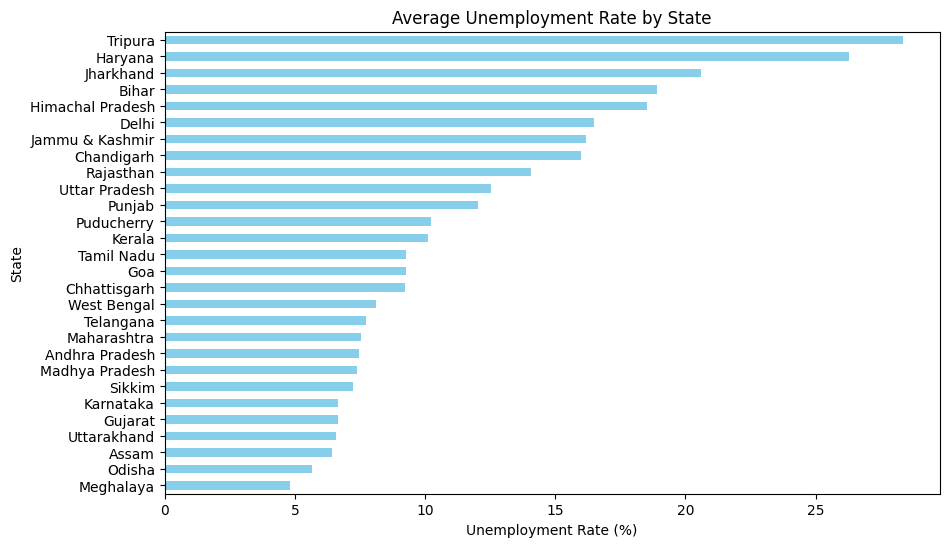

In [7]:
import matplotlib.pyplot as plt

state_avg_unemployment.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')

plt.xlabel("Unemployment Rate (%)")
plt.ylabel("State")
plt.title("Average Unemployment Rate by State")
plt.show()


<ipython-input-8-c21f10a8da66>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])  # Convert to Date format


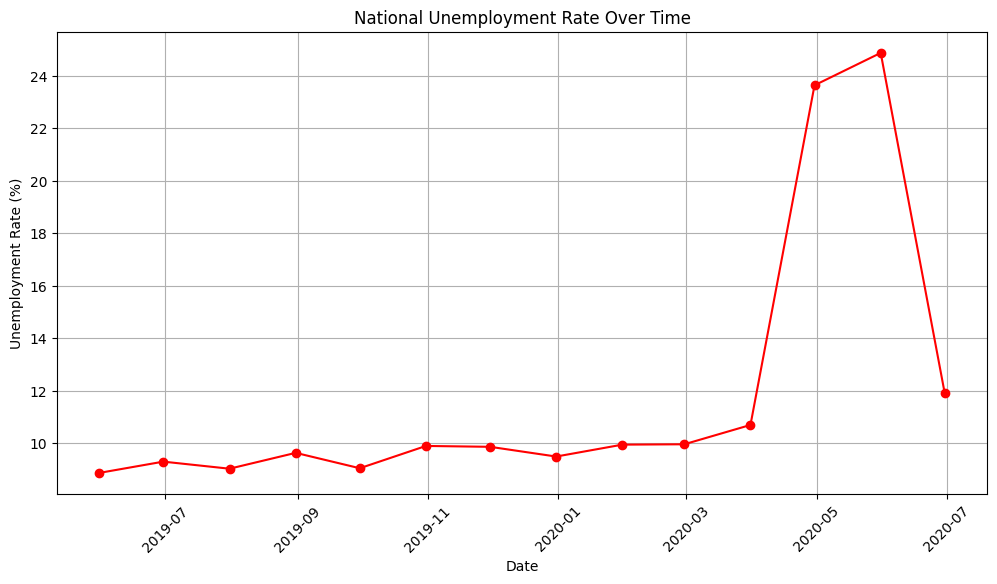

In [8]:
df["Date"] = pd.to_datetime(df["Date"])  # Convert to Date format

monthly_unemployment = df.groupby("Date")["Estimated Unemployment Rate (%)"].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_unemployment, marker='o', linestyle='-', color='red')

plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("National Unemployment Rate Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [9]:
area_unemployment = df.groupby("Area")["Estimated Unemployment Rate (%)"].mean()
print(area_unemployment)


Area
Rural    10.324791
Urban    13.166614
Name: Estimated Unemployment Rate (%), dtype: float64


In [10]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Cleaned_Unemployment_Data.csv", index=False)
print("File saved successfully!")


File saved successfully!


In [11]:
df_cleaned = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cleaned_Unemployment_Data.csv")
print(df_cleaned.head())  # Check if everything looks good


           Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  2019-05-31   Monthly                             3.65   
1  Andhra Pradesh  2019-06-30   Monthly                             3.05   
2  Andhra Pradesh  2019-07-31   Monthly                             3.75   
3  Andhra Pradesh  2019-08-31   Monthly                             3.32   
4  Andhra Pradesh  2019-09-30   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  


In [16]:
df_top = df_top.copy()  # Create an explicit copy to avoid warning

df_top.loc[:, "Date"] = pd.to_datetime(df_top["Date"])  # Convert Date column

df_top.loc[:, "Smoothed Rate"] = df_top.groupby("Region")["Estimated Unemployment Rate (%)"].transform(
    lambda x: x.rolling(window=2, min_periods=1).mean()
)


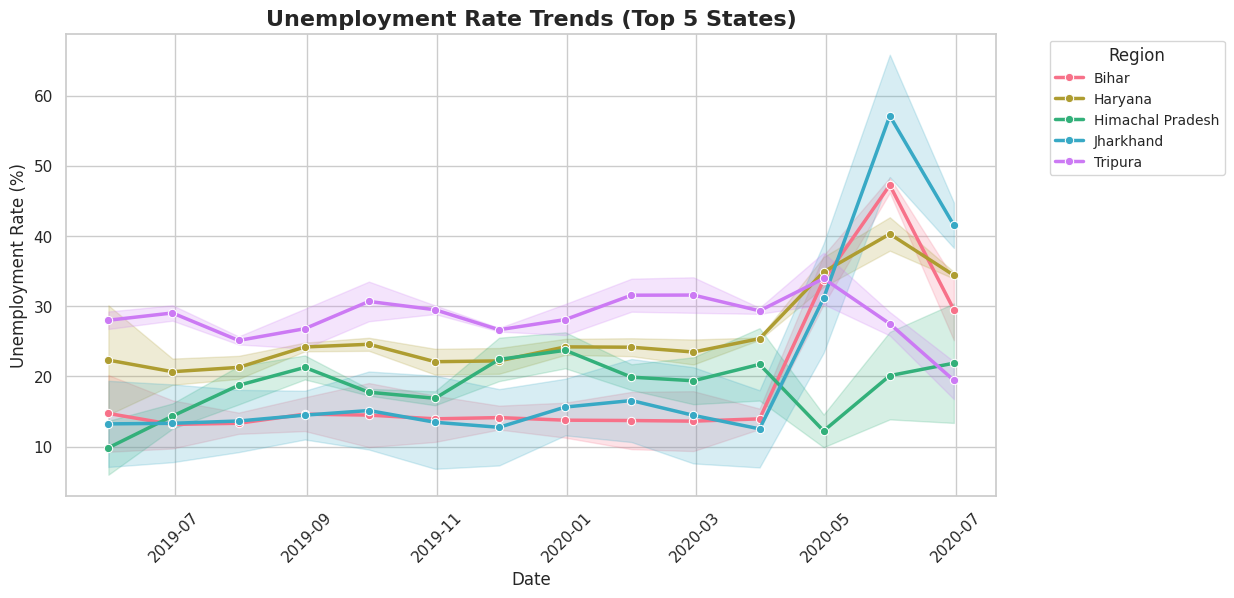

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set a modern style
sns.set_theme(style="whitegrid")

# Convert Date to datetime format for better plotting
df_top["Date"] = pd.to_datetime(df_top["Date"])

# Apply a rolling average (window=2) for smooth curves
df_top["Smoothed Rate"] = df_top.groupby("Region")["Estimated Unemployment Rate (%)"].transform(lambda x: x.rolling(window=2, min_periods=1).mean())

# Create the figure
plt.figure(figsize=(12, 6))

# Use a beautiful color palette
palette = sns.color_palette("husl", len(df_top["Region"].unique()))

# Plot with confidence intervals
sns.lineplot(
    data=df_top, x="Date", y="Smoothed Rate", hue="Region",
    palette=palette, linewidth=2.5, marker="o", markersize=6
)

# Make the title bold and slightly larger
plt.title("Unemployment Rate Trends (Top 5 States)", fontsize=16, fontweight="bold")

# Improve the axis labels
plt.xlabel("Date", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend outside the plot for clarity
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Display the improved chart
plt.show()
